# Solar in situ comparison

In [2]:
import sys
import os
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import glob
import calendar
import seaborn as sns
sys.path.append('/g/data/qz03/wp3/code/git-repo')
from utils import *
from scipy import stats

## Domain and data availability plots

### Solar data availability

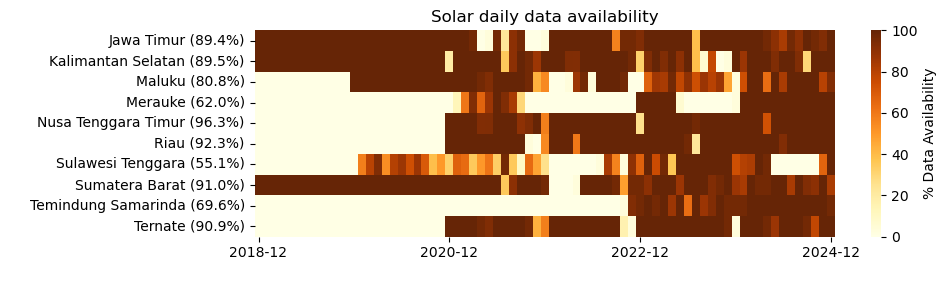

<Figure size 640x480 with 0 Axes>

In [3]:
solar_station_latlon_df = pd.read_csv('/g/data/qz03/wp3/data/obs/solar/station_metadata.csv').drop(columns=['No']).dropna()

files = ['/g/data/qz03/wp3/data/obs/solar/'+station_csv for station_csv in os.listdir('/g/data/qz03/wp3/data/obs/solar') if 'station_metadata' not in station_csv]
dfs = {f.split('/')[-1].replace('.csv',''): pd.read_csv(f) for f in files}

months_list = []
for df in dfs.values():
    df['Date'] = pd.to_datetime(df['Date'])
    months_list.append(df['Date'].dt.tz_convert(None).dt.to_period('M').drop_duplicates())

all_months = pd.Index(pd.concat(months_list).drop_duplicates()).sort_values()

availability = pd.DataFrame(index=dfs.keys(), columns=all_months.astype(str))
for station, df in dfs.items():
    df['year_month'] = df['Date'].dt.tz_convert(None).dt.to_period('M')
    total_per_month = df.groupby('year_month').size()
    avail_per_month = df.groupby('year_month')['GHI_sum'].apply(lambda x: (x.notna() & (x != 0)).sum()) 
    pct = (avail_per_month / total_per_month).reindex(all_months, fill_value=0) * 100
    availability.loc[station] = pct.values
    
availability.index = availability.index.str[:5]
new_index = []
for station, df in dfs.items():
    total = len(df)
    available = (df['GHI_sum'].notna() & (df['GHI_sum'] != 0)).sum()
    percent = (available / total) * 100 if total > 0 else 0
    label = f"{station.split('_')[1]} ({percent:.1f}%)"
    new_index.append(label)

availability.index = new_index
availability.sort_index(inplace=True)
plt.figure(figsize=(10, len(dfs)*0.05 + 2.5))
sns.heatmap(availability.astype(float), cmap='YlOrBr', cbar_kws={'label': '% Data Availability'}, xticklabels=24)
plt.title("Solar daily data availability")
plt.ylabel(' ')
plt.xlabel(' ')
plt.tight_layout()
plt.show()
plt.clf()

In [5]:
solar_station_latlon_df.sort_values(by='Station Name', inplace=True)
solar_station_latlon_df['status'] = [1, 1, 1, 2, 1, 1, 2, 1, 2, 1]
solar_station_latlon_df

,Station Name,Lat,Lon,status
2,Jawa Timur,-7.901390,112.596670,1
3,Kalimantan Selatan,-3.462250,114.840840,1
8,Maluku,-3.338810,128.368450,1
9,Merauke,-8.387090,140.516500,2
5,Nusa Tenggara Timur,-10.139000,123.666900,1
1,Riau,0.411970,101.216930,1
6,Sulawesi Tenggara,-4.056220,122.449160,2
0,Sumatera Barat,-0.550000,100.370000,1
4,Temindung Samarinda,-0.374146,117.253808,2
7,Ternate,0.825940,127.381300,1
